<center> <img src="logo_ifba.jpg" alt="jpg_python" width="100" height=""> </center>
<br><br>
<center> <img src="logo_coext.jpg" alt="jpg_python" width="200" height=""> </center>
<br><br>
<center><div style="text-align:center">    <a href="https://colab.research.google.com/github/ProfAllanIFBA/Curso_Python_Com_Jupyter_Notebook/blob/main/Capitulo028_Aprendizado_Profundo_com_Tensor_Flow/Capitulo028_Aprendizado_Profundo_com_Tensor_Flow.ipynb">Link Colab</a> 
</div><br><br></center>
<div align="center"><span style="font-size: 26px;"><strong>Python Com Jupyter Notebook</strong></span></div><br><br>
<center> <img src="python_gif.gif" alt="gif_python" width="80"> </center>

Este material apresenta uma explicação detalhada sobre o uso do software de programação em Python chamado Jupyter Notebook, com foco na análise de dados. Abordaremos desde estruturas básicas, como listas e dicionários, até estruturas mais complexas voltadas para a análise de dados, como pandas e seaborn, além de ferramentas destinadas à inteligência artificial.


<font color='red'> <u>Este é um material de uso público e totalmente gratuito</u>. Contudo, eventuais edições são de responsabilidade de quem as fizer. </font>

Você pode ajudar a melhorar este material!

Contato e Sugestões: allansoares@ifba.edu.br.

[**Equipe Executora**](https://github.com/Allanifba/Curso_Python_Com_Jupyter_Notebook/blob/main/Capitulo000_Equipe/Capitulo000_Equipe.ipynb)

<div style="border: 2px solid black; padding: 10px; width: 100%; background-color: lightgray; display: flex; align-items: center;">
    <h1 style="color: red; text-align: center; margin: auto;">
        Capítulo  28: Aprendizado Profundo com TensorFlow
    </h1>
</div>

<font color='red'></font>
<a href=""></a>

Iniciaremos este capítulo com um guia detalhado para desenvolver uma rede neural que é capaz de reconhecer imagens pertencentes a dez categorias distintas: *avião, automóvel, pássaro, gato, cachorro, sapo, cavalo, barco* e *caminhão*. Inicialmente, construiremos o modelo utilizando dados provenientes de um banco de dados externo. Posteriormente, avançaremos para uma etapa mais complexa, onde treinaremos o modelo usando dados armazenados localmente, incluindo etapas críticas de preparação e formatação das imagens antes do treinamento. Este tutorial foi desenhado para fornecer uma compreensão abrangente e prática do uso do TensorFlow em aplicações de reconhecimento de imagens.

## <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 22px;"><strong>28.1 Exemplo Com Dados Externos</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

A seguir, apresentaremos a primeira versão do nosso exemplo. Para isso, utilizaremos dados do CIFAR-10, que serão carregados na memória do nosso sistema. Estes subconjuntos fazem parte do conjunto de dados de 80 milhões de imagens minúsculas e estão rotulados para facilitar o uso em aplicações de aprendizado de máquina. Eles foram coletados e organizados por Alex Krizhevsky, Vinod Nair e Geoffrey Hinton. Mais informações no link: https://www.cs.toronto.edu/~kriz/cifar.html

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.1.1 Instalações e Importações Necessárias* </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Antes de começar, recomendamos enfaticamente que consulte a documentação oficial do [TensorFlow](https://www.tensorflow.org/) para assegurar a compatibilidade com seu sistema operacional e para estar ciente de possíveis problemas e suas soluções.

- Neste tutorial, utilizaremos a versão 3.11.5 do Jupyter Notebook, específica para sistemas operacionais Windows. A versão necessária pode ser baixada através do seguinte link: https://repo.anaconda.com/archive/Anaconda3-2023.09-0-Windows-x86_64.exe.

In [ ]:
# Versão da linguagem python usada no Jupyter Notebook
from platform import python_version

python_version()

- Além disso usamos a versão  2.12.0 do TensorFlow.

In [ ]:
# Instalando o TensorFlow 2.12.0
!pip install tensorflow==2.12

In [ ]:
import tensorflow as tf

print(tf.__version__)

Para que tudo corra bem compile a próxima célula e torça para não dar nenhum erro. Em caso de erro explique ao gpt a situação especificando as versões Python e TensorFlow, o sistema operacional etc. Caso não consiga resolver rode pelo colab. Neste último caso você terá que entender sobre endereçamento de pastas na referida plataforma.

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

<div style="width: 50%; height: 4px; background-color: red;"> <br> <font

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.1.2 Carregamento e Visualização das Imagens </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

A seguir faremos o carregamento bem como a visualização de algumas figuras disponíveis no banco de dados CIFAR-10.

In [ ]:
# Carrega o dataset CIFAR-10
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.cifar10.load_data()

In [ ]:
# Clases das imagens
classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',\
           'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

In [ ]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

*A normalização dos valores dos pixels para uma escala comum é um passo importante no pré-processamento de imagens para redes neurais. Normalmente, os pixels das imagens coloridas em formatos como JPEG ou PNG variam de 0 a 255 (representando a intensidade mínima e máxima, respectivamente, para cada canal de cor). A divisão por 255 é usada para normalizar esses valores para uma escala de 0 a 1.*

In [ ]:
# Função para exibir as imagens
def exibir_imagens(images, labels):
    plt.figure(figsize = (10,10))
    for i in range(25):
        plt.subplot(5, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(classes[labels[i][0]])
    plt.show()

In [ ]:
# Executa a função
exibir_imagens(imagens_treino, labels_treino)

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.1.3 Treinando a Rede Neural </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

<div style="text-align:center;">
    <img src="cnn.gif" alt="gif_python" width="300">
    <img src="carro.jpg" alt="jpg_python" width="700">
</div>


Vejamos o treinamento da nossa rede neuaral.

In [ ]:
# Modelo

# Cria o objeto de sequência de camadas
modelo_reconhecimento = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
modelo_reconhecimento.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
modelo_reconhecimento.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
modelo_reconhecimento.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_reconhecimento.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
modelo_reconhecimento.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_reconhecimento.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Adicionar camadas de classificação
modelo_reconhecimento.add(layers.Flatten())
modelo_reconhecimento.add(layers.Dense(64, activation = 'relu'))
modelo_reconhecimento.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# Sumário do modelo
modelo_reconhecimento.summary()

In [ ]:
# Compilação do modelo
modelo_reconhecimento.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
%%time
history = modelo_reconhecimento.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_teste, labels_teste))

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.1.4 Avaliando o Treinamento </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Entramos agora na etapa de verificação do modelo, onde utilizaremos imagens que não foram incluídas nos conjuntos de treino. Para isso, selecionamos algumas imagens e as armazenamos na pasta 'dados_verificacao'. Você é encorajado a adicionar mais imagens a esta pasta, especialmente aquelas que se alinham às categorias abordadas no treinamento do modelo. Essa prática é fundamental para avaliar a capacidade do modelo de generalizar e reconhecer corretamente novos dados, refletindo assim sua eficácia em cenários reais.

In [ ]:
# Avalia o modelo
erro_teste, acc_teste = modelo_reconhecimento.evaluate(imagens_teste, labels_teste, verbose = 2)

NameError: name 'modelo_reconhecimento' is not defined

In [ ]:
print('\nAcurácia com Dados de Teste:', acc_teste)

In [ ]:
# Carrega uma nova imagem
nova_imagem = Image.open("dados_verificacao/nova_imagem1.jpg")

In [ ]:
# Dimensões da imagem (em pixels)
nova_imagem.size

In [ ]:
# Obtém largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [ ]:
print("A largura da imagem é: ", largura)
print("A altura da imagem é: ", altura)

In [ ]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

In [ ]:
# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [ ]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [ ]:
# Previsões
previsoes = modelo_reconhecimento.predict(nova_imagem_array)

In [ ]:
print(previsoes)

In [ ]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = classes[classe_prevista]

In [ ]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.1.5 Salvado e Carregando o Modelo </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

É viável preservar o modelo treinado salvando-o, permitindo que seja carregado apenas quando necessário. Esta abordagem é eficaz mesmo após reiniciar o kernel e limpar todas as saídas do Jupyter Notebook. Os dados do modelo permanecem acessíveis e podem ser facilmente recuperados através do carregamento do arquivo salvo

#### Salvando o modelo treinado

In [ ]:
modelo_reconhecimento.save('reconhecimento_de_imagem.h5')  # Salva o modelo no formato HDF5

#### Carregando o modelo treinado

In [ ]:
modelo_reconhecimento = load_model('reconhecimento_de_imagem.h5')  # Carrega o modelo

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.1.6 Empacotando o Modelo </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Você deve ter percebido as diversas etapas envolvidas na compilação das células até a criação do modelo. No entanto, uma vez que o modelo é treinado, podemos simplificar seu uso encapsulando as etapas necessárias em uma função dedicada. Esta abordagem facilita a reutilização do modelo para novas imagens sem a necessidade de repetir todo o processo de treinamento ou pré-processamento. A função reconhecer_imagem ilustra essa prática: ela carrega um modelo previamente treinado e uma nova imagem, executa as etapas de pré-processamento necessárias, e usa o modelo para classificar a imagem. Este método não apenas economiza tempo, mas também torna o uso do modelo para inferência em novas imagens uma tarefa muito mais direta e eficiente.

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

def reconhecer_imagem(nome_img,arquivo):

    modelo_reconhecimento = load_model(arquivo)  # Carrega o modelo

    # Clases das imagens
    classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo',\
               'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

    # Carrega uma nova imagem
    nova_imagem = Image.open(nome_img)

    # Dimensões da imagem (em pixels)
    nova_imagem.size

    # Obtém largura e altura da imagem
    largura = nova_imagem.width
    altura = nova_imagem.height

    # Redimensiona para 32x32 pixels
    nova_imagem = nova_imagem.resize((32, 32))

    # Exibir a imagem
    plt.figure(figsize = (1,1))
    plt.imshow(nova_imagem)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # Converte a imagem para um array NumPy e normaliza
    nova_imagem_array = np.array(nova_imagem) / 255.0

    # Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
    nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

    # Previsões
    previsoes = modelo_reconhecimento.predict(nova_imagem_array)

    # Obtém a classe com maior probabilidade e o nome da classe
    classe_prevista = np.argmax(previsoes)
    nome_classe_prevista = classes[classe_prevista]

    print("A nova imagem foi classificada como:", nome_classe_prevista)

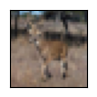

1/1 [==============================] - 0s 152ms/step
A nova imagem foi classificada como: Cervo


In [ ]:
# Chamando a função associada ao modelo treinado
reconhecer_imagem('dados_verificacao/nova_imagem7.jpg','reconhecimento_de_imagem.h5')

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.1.7 Reconhecimento de Imagem A Partir da Webcam</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
import numpy as np
import mss
import cv2
from tensorflow.keras.models import load_model

def reconhecer_imagem(img_array, modelo):
    # Remove o canal alfa se a imagem tiver 4 canais
    if img_array.shape[-1] == 4:
        img_array = img_array[..., :3]

    # Redimensiona para 32x32 pixels
    img_array = cv2.resize(img_array, (32, 32))

    # Converte a imagem para um array NumPy e normaliza
    img_array = img_array / 255.0

    # Expande a dimensão do array para o formato (1, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Previsões
    previsoes = modelo.predict(img_array)

    # Obtém a classe com maior probabilidade
    classe_prevista = np.argmax(previsoes)
    return classe_prevista

# Carrega o modelo
modelo_reconhecimento = load_model('reconhecimento_de_imagem.h5')  # Substitua pelo nome do seu arquivo de modelo

# Classes das imagens
classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

# Inicializa o mss para captura de tela
sct = mss.mss()

while True:
    # Captura a tela
    monitor = sct.monitors[1]  # Captura o primeiro monitor
    frame = np.array(sct.grab(monitor))

    # Processa a imagem e faz a previsão
    classe_prevista = reconhecer_imagem(frame, modelo_reconhecimento)
    print("A nova imagem foi classificada como:", classes[classe_prevista])

    # Para interromper o loop, pressione Ctrl+C no terminal
    try:
        cv2.waitKey(1000)  # Aguarda 1000 milissegundos
    except KeyboardInterrupt:
        break

# Fecha todas as janelas abertas
cv2.destroyAllWindows()


1/1 [==============================] - 0s 92ms/step
A nova imagem foi classificada como: Cachorro
1/1 [==============================] - 0s 18ms/step
A nova imagem foi classificada como: Barco
1/1 [==============================] - 0s 20ms/step
A nova imagem foi classificada como: Cachorro
1/1 [==============================] - 0s 18ms/step
A nova imagem foi classificada como: Cachorro
1/1 [==============================] - 0s 18ms/step
A nova imagem foi classificada como: Cachorro
1/1 [==============================] - 0s 21ms/step
A nova imagem foi classificada como: Cachorro
1/1 [==============================] - 0s 21ms/step
A nova imagem foi classificada como: Barco
1/1 [==============================] - 0s 18ms/step
A nova imagem foi classificada como: Avião


## <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 22px;"><strong>28.2 Exemplo Com Dados Próprios</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Vamos iniciar um tutorial passo a passo sobre o treinamento de uma rede neural para reconhecimento de imagens, utilizando dados personalizados do usuário. Este processo abrange diversas etapas, começando pela formatação das imagens para um tamanho padrão, seguida pela definição das classes e pela preparação dos dados para treinamento. Utilizaremos uma seleção específica de dados do dataset CIFAR-10, que, para fins didáticos, vamos considerar como se fossem dados próprios. Inicialmente, extrairemos as imagens processadas em lote (batch) para o formato PNG. Em seguida, selecionaremos imagens de apenas três categorias - Avião, Automóvel e Pássaro - e as processaremos em lote. Este tutorial é abrangente e detalhado, portanto, acompanhe as células de código a seguir para entender completamente cada etapa do processo desde o início.

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.1 Visualização das Imagens de Treino no Formato PNG </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Inicialmente você deve baixar o dataset CIFAR-10. Isso pode ser feito no link: https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz. Outros formatos a serem utilizados em Matlab e C podem ser encontrados em: https://www.cs.toronto.edu/~kriz/cifar.html.

Após baixar o arquivo extraia o seu conteúdo para a pasta "data_batchs". Em seguida execute as células a seguir para visualizar uma das imagens disponíveis no lote "data_batch_1".

In [ ]:
# Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

In [ ]:
import pickle
import numpy as np

# Substitua 'caminho_do_arquivo' pelo caminho do arquivo descompactado
with open('data_batchs/data_batch_1', 'rb') as file:
    dict = pickle.load(file, encoding='bytes')

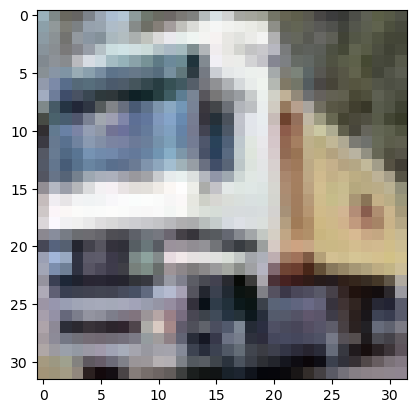

In [ ]:
import matplotlib.pyplot as plt

# Função para converter os dados do CIFAR-10 para uma imagem RGB
def cifar10_to_img(cifar10_data):
    img_r = cifar10_data[:1024].reshape((32, 32))
    img_g = cifar10_data[1024:2048].reshape((32, 32))
    img_b = cifar10_data[2048:].reshape((32, 32))
    img = np.dstack((img_r, img_g, img_b))
    return img

# Exemplo de como visualizar a primeira imagem
img = cifar10_to_img(dict[b'data'][1])
plt.imshow(img)
plt.show()


Como vamos fazer o processo do zero vamos desconverter as imagens em lote para o formato png para a escolha das categorias. O processo pode demorar.

In [ ]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def save_images_from_pickle_with_labels(file_path, save_dir):
    with open(file_path, 'rb') as file:
        # Carregando o arquivo batch
        batch = pickle.load(file, encoding='bytes')
        images = batch[b'data']
        labels = batch[b'labels']

        # Reshape das imagens
        images = images.reshape(-1, 3, 32, 32).transpose(0, 2, 3, 1)

        # Loop para salvar cada imagem
        for i, (image_array, label) in enumerate(zip(images, labels)):
            # Criar diretório para o label, se ainda não existir
            label_dir = os.path.join(save_dir, f'label_{label}')
            if not os.path.exists(label_dir):
                os.makedirs(label_dir)

            # Salvar a imagem
            image = Image.fromarray(image_array)
            image_path = os.path.join(label_dir, f'image_{i}_label_{label}.png')
            image.save(image_path)


# Criando a pasta na qual as imagens serão salvas
save_dir = 'imagens_png'  # Substitua com o caminho desejado
if not os.path.exists(save_dir):
    os.makedirs(save_dir)


# Caminho da pasta onde os arquivos batch estão localizados
batch_folder = 'data_batchs'

# Lista dos caminhos dos arquivos batch
file_paths = [os.path.join(batch_folder, f'data_batch_{i}') for i in range(1, 6)]  # De data_batch_1 a data_batch_5

# Loop para processar cada arquivo
for file_path in file_paths:
    save_images_from_pickle_with_labels(file_path, save_dir)

Navegue até a pasta "imagens_png" e observe as subpastas correspondentes aos labels, "label_0", "label_1", "label_2", ..., "labrl_9" ("Avião", "Automóvel", "Pássaro", ..., "Caminhão").

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.2 Escolha das Classes do Nosso Treino </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Iniciaremos agora o experimento com as imagens das categorias Avião, Automóvel e Pássaro. Começaremos a partir de suas respectivas pastas, que contêm imagens no formato PNG. Estas imagens serão convertidas em um único arquivo de lote para facilitar o processamento. Crie a pasta "imagens_nosso_teste" e coloque nela as pastas das imagnes correspondentes aos "label_0", "label_1" e "label_2".

In [ ]:
from PIL import Image
import numpy as np
import os

def load_images_from_folder(base_folder):
    data = []
    labels = []
    label_dict = {'label_0': 0, 'label_1': 1, 'label_2': 2}

    for label_folder, label in label_dict.items():
        folder_path = os.path.join(base_folder, label_folder)
        for filename in os.listdir(folder_path):
            if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
                img_path = os.path.join(folder_path, filename)
                img = Image.open(img_path)
                img = np.array(img)
                data.append(img)
                labels.append(label)

    return np.array(data), np.array(labels)

# Caminho para a pasta com as imagens e rótulos
base_folder = 'imagens_nosso_teste'
data, labels = load_images_from_folder(base_folder)

In [ ]:
import pickle

def create_batch_file(data, labels, output_file):
    batch = {
        'data': data,
        'labels': labels
    }

    with open(output_file, 'wb') as file:
        pickle.dump(batch, file, protocol=pickle.HIGHEST_PROTOCOL)

# Caminho para o arquivo batch que será criado
output_file = 'meu_batch_personalizado'
create_batch_file(data, labels, output_file)


Navegue até a pasta "imagens_nosso_teste" e procure o arquivo "meu_batch_personalizado". Este será o arquivo que utilizaremos para o treinamento do nosso modelo.

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.3 Construindo as Classes e Definindo as Imagens de Treino</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
import pickle
import numpy as np

def load_custom_data(batch_file):
    with open(batch_file, 'rb') as file:
        batch = pickle.load(file)
        imagens = np.array(batch['data'])
        labels = np.array(batch['labels'])
    return imagens, labels

# Caminho para o seu arquivo batch personalizado
batch_file = 'meu_batch_personalizado'

# Carregando os dados do seu arquivo batch
imagens, labels = load_custom_data(batch_file)

# Embaralhar os dados
indices = np.arange(len(imagens))
np.random.shuffle(indices)
imagens = imagens[indices]
labels = labels[indices]

# Dividir os dados em conjuntos de treino e teste
num_treino = int(len(imagens) * 0.8)  # 80% para treino, 20% para teste
imagens_treino, imagens_teste = imagens[:num_treino], imagens[num_treino:]
labels_treino, labels_teste = labels[:num_treino], labels[num_treino:]

In [ ]:
# Clases das imagens
classes = ['Avião', 'Automóvel', 'Pássaro']

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.4 Carregamento e Visualização das Imagens </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

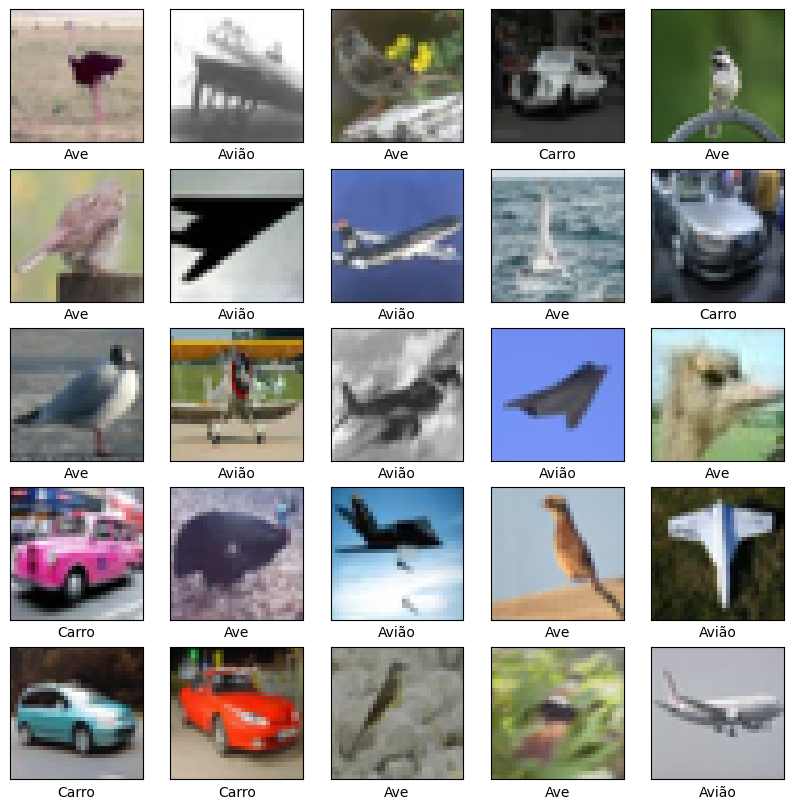

In [ ]:
import numpy as np

def visualiza_imagens_aleatorias(images, labels, classes, num_images=25):
    plt.figure(figsize=(10,10))

    # Seleciona índices aleatórios
    indices_aleatorios = np.random.choice(range(len(images)), num_images, replace=False)

    for i, idx in enumerate(indices_aleatorios):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap=plt.cm.binary)

        # Ajuste para rótulos 1D ou 2D
        label = labels[idx] if labels.ndim == 1 else labels[idx][0]
        plt.xlabel(classes[label])

    plt.show()

# Substitua 'classes' pelos nomes das suas classes
classes = ['Avião', 'Carro', 'Ave']  # Exemplo
visualiza_imagens_aleatorias(imagens_treino, labels_treino, classes)


#### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 14px;"><strong>28.2.4.1 Testando a Randomização</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Após converter as imagens em formato PNG para o nosso arquivo em lote, decidimos embaralhar aleatoriamente as imagens. Este passo é crucial para evitar qualquer viés durante o treinamento da rede neural. Em um conjunto de dados não randomizado, se as imagens estivessem agrupadas por classes, a rede poderia desenvolver um padrão de aprendizado enviesado, baseando-se na ordem das imagens em vez de suas características individuais. Para verificar a eficácia da randomização, altere o valor da variável "índice" de zero para 1, 2, 3, etc., e observe que as imagens agora aparecem em uma ordem não sequencial, sem uma organização específica por classes. Esta abordagem assegura que o modelo aprenda a identificar características relevantes para cada classe, independentemente da sequência em que as imagens são apresentadas durante o treinamento.

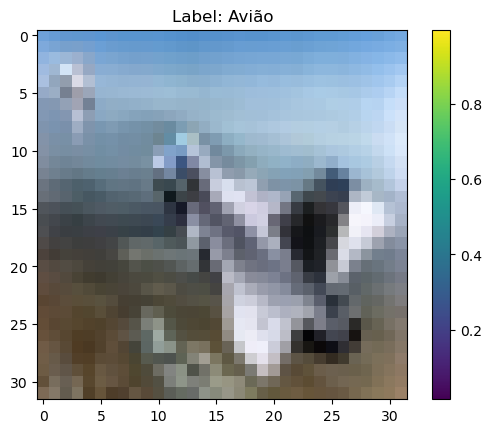

In [ ]:
#### import matplotlib.pyplot as plt

def visualizar_imagem_especifica(imagens, labels, indice, classes):
    plt.figure()
    plt.imshow(imagens[indice])
    plt.colorbar()
    plt.grid(False)
    plt.title(f"Label: {classes[labels[indice]]}")
    plt.show()

# Exemplo de uso da função
indice = 0  # Substitua pelo índice da imagem que você quer visualizar
classes = ['Avião', 'Automóvel', 'Pássaro']  # Substitua pelos nomes reais das suas classes

visualizar_imagem_especifica(imagens_treino, labels_treino, indice, classes)


### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.5 Treinando a Rede Neural </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
# Modelo

# Cria o objeto de sequência de camadas
nosso_modelo = models.Sequential()

# Adiciona o primeiro bloco de convolução e max pooling (camada de entrada)
nosso_modelo.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
nosso_modelo.add(layers.MaxPooling2D((2, 2)))

# Adiciona o segundo bloco de convolução e max pooling (camada intermediária)
nosso_modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
nosso_modelo.add(layers.MaxPooling2D((2, 2)))

# Adiciona o terceiro bloco de convolução e max pooling (camada intermediária)
nosso_modelo.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
nosso_modelo.add(layers.MaxPooling2D((2, 2)))

In [ ]:
# Adicionar camadas de classificação
nosso_modelo.add(layers.Flatten())
nosso_modelo.add(layers.Dense(64, activation = 'relu'))
nosso_modelo.add(layers.Dense(10, activation = 'softmax'))

In [ ]:
# Sumário do modelo
nosso_modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

In [ ]:
# Compilação do modelo
nosso_modelo.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

In [ ]:
%%time
history = nosso_modelo.fit(imagens_treino,
                         labels_treino,
                         epochs = 10,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/10
308/308 [==============================] - 8s 22ms/step - loss: 0.8196 - accuracy: 0.6193 - val_loss: 0.5651 - val_accuracy: 0.7678
Epoch 2/10
308/308 [==============================] - 7s 22ms/step - loss: 0.5306 - accuracy: 0.7876 - val_loss: 0.5038 - val_accuracy: 0.7966
Epoch 3/10
308/308 [==============================] - 6s 20ms/step - loss: 0.4582 - accuracy: 0.8191 - val_loss: 0.4474 - val_accuracy: 0.8222
Epoch 4/10
308/308 [==============================] - 6s 21ms/step - loss: 0.3967 - accuracy: 0.8477 - val_loss: 0.4062 - val_accuracy: 0.8400
Epoch 5/10
308/308 [==============================] - 6s 20ms/step - loss: 0.3500 - accuracy: 0.8686 - val_loss: 0.3612 - val_accuracy: 0.8660
Epoch 6/10
308/308 [==============================] - 6s 21ms/step - loss: 0.3215 - accuracy: 0.8739 - val_loss: 0.3888 - val_accuracy: 0.8482
Epoch 7/10
308/308 [==============================] - 6s 21ms/step - loss: 0.2883 - accuracy: 0.8906 - val_loss: 0.3646 - val_accuracy: 0.8636

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.6 Avaliando o Treinamento </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
# Avalia o modelo
erro_teste, acc_teste = nosso_modelo.evaluate(imagens_teste, labels_teste, verbose = 2)

77/77 - 0s - loss: 0.3465 - accuracy: 0.8766 - 459ms/epoch - 6ms/step


In [ ]:
print('\nAcurácia com Dados de Teste:', acc_teste)


Acurácia com Dados de Teste: 0.8765732645988464


In [ ]:
# Carrega uma nova imagem
nova_imagem = Image.open("dados_verificacao_nosso_modelo/nosso_modelo_img_1.jpg")

In [ ]:
# Dimensões da imagem (em pixels)
nova_imagem.size

(1919, 1199)

In [ ]:
# Obtém largura e altura da imagem
largura = nova_imagem.width
altura = nova_imagem.height

In [ ]:
print("A largura da imagem é: ", largura)
print("A altura da imagem é: ", altura)

A largura da imagem é:  1919
A altura da imagem é:  1199


In [ ]:
# Redimensiona para 32x32 pixels
nova_imagem = nova_imagem.resize((32, 32))

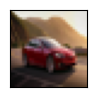

In [ ]:
# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem)
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

In [ ]:
# Expande a dimensão do array para que ele tenha o formato (1, 32, 32, 3)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

In [ ]:
# Previsões
previsoes = nosso_modelo.predict(nova_imagem_array)

1/1 [==============================] - 0s 92ms/step


In [ ]:
print(previsoes)

[[2.55361479e-02 9.73507404e-01 9.56354663e-04 2.74710921e-08
  5.24865555e-08 1.87663112e-08 2.04337933e-08 1.36069085e-08
  5.99712280e-09 1.24751889e-08]]


In [ ]:
# Obtém a classe com maior probabilidade e o nome da classe
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = classes[classe_prevista]

In [ ]:
print("A nova imagem foi classificada como:", nome_classe_prevista)

A nova imagem foi classificada como: Automóvel


### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.7 Salvado e Carregando o Modelo </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

É viável preservar o modelo treinado salvando-o, permitindo que seja carregado apenas quando necessário. Esta abordagem é eficaz mesmo após reiniciar o kernel e limpar todas as saídas do Jupyter Notebook. Os dados do modelo permanecem acessíveis e podem ser facilmente recuperados através do carregamento do arquivo salvo

#### Salvando o modelo treinado

In [ ]:
nosso_modelo.save('nosso_modelo_de_reconhecimento.h5')  # Salva o modelo no formato HDF5

#### Carregando o modelo treinado

In [ ]:
modelo_reconhecimento = load_model('nosso_modelo_de_reconhecimento.h5')  # Carrega o modelo

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.2.8 Empacotando o Modelo </strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
# Imports
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from tensorflow.keras.models import load_model

def reconhecer_imagem(nome_img, arquivo_modelo):

    # Carrega o modelo treinado
    modelo_reconhecimento = load_model(arquivo_modelo)

    # Classes das imagens (conforme seus labels personalizados)
    classes = ['Avião', 'Automóvel', 'Pássaro']

    # Carrega uma nova imagem
    nova_imagem = Image.open(nome_img)

    # Redimensiona para 32x32 pixels (conforme o esperado pelo modelo)
    nova_imagem = nova_imagem.resize((32, 32))

    # Exibir a imagem
    plt.figure(figsize=(1, 1))
    plt.imshow(nova_imagem)
    plt.xticks([])
    plt.yticks([])
    plt.show()

    # Converte a imagem para um array NumPy e normaliza
    nova_imagem_array = np.array(nova_imagem) / 255.0

    # Expande a dimensão do array para o formato esperado pelo modelo
    nova_imagem_array = np.expand_dims(nova_imagem_array, axis=0)

    # Previsões
    previsoes = modelo_reconhecimento.predict(nova_imagem_array)

    # Obtém a classe com maior probabilidade e o nome da classe
    classe_prevista = np.argmax(previsoes)
    nome_classe_prevista = classes[classe_prevista]

    print("A nova imagem foi classificada como:", nome_classe_prevista)

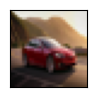

1/1 [==============================] - 0s 96ms/step
A nova imagem foi classificada como: Automóvel


In [ ]:
reconhecer_imagem('dados_verificacao_nosso_modelo/nosso_modelo_img_1.jpg','nosso_modelo_de_reconhecimento.h5')

## <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 22px;"><strong>28.3 Conversão de Imagem Para Tamanho 32x32</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

O banco de dados usando para nosso treinamento já se apresentava em imagens com tamanho 32x32 pixels. Contudo, em muitas situações coletaremos imagens em diversos tamanhos. Apresentaremos a seguir métodos para a conversão para o tamanho 32x32 pixels.

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.3.1 Redimensionamento com Manutenção da Relação de Aspecto</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Primeiramente, redimensione a imagem para que o maior lado (largura ou altura) seja igual a 32 pixels, mantendo a relação de aspecto. Em seguida, preencha o espaço restante para formar uma imagem 32x32. Este método é útil em situações onde é importante manter a integridade visual da imagem original, sem distorcer sua proporção.

In [ ]:
from PIL import Image
import os

def resize_and_pad_images(source_folder, target_folder, size=(32, 32), fill_color=(0, 0, 0)):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for filename in os.listdir(source_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(source_folder, filename)
            img = Image.open(img_path)

            # Redimensionamento mantendo a relação de aspecto
            img.thumbnail((size[0], size[1]))

            # Criando uma nova imagem com fundo preto
            new_img = Image.new("RGB", size, fill_color)

            # Calculando posição para colar a imagem redimensionada
            x = (size[0] - img.size[0]) // 2
            y = (size[1] - img.size[1]) // 2

            new_img.paste(img, (x, y))
            new_img.save(os.path.join(target_folder, filename))

source_folder = 'imagens_originais'
target_folder = 'imagens_processadas_aspect_ratio'
resize_and_pad_images(source_folder, target_folder)

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.3.2 Preenchimento (Padding)</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Redimensione a imagem para caber dentro de um quadrado 32x32, mantendo a relação de aspecto, e preencha o espaço restante com um fundo (como preto, branco ou algum valor de pixel neutro). O uso deste método é semelhante ao anterior.

In [ ]:
from PIL import Image, ImageOps
import os

def resize_and_pad_images(source_folder, target_folder, size=(32, 32), fill_color=(0, 0, 0)):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for filename in os.listdir(source_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(source_folder, filename)
            img = Image.open(img_path)

            # Mantendo a relação de aspecto
            ratio = min(size[0] / img.size[0], size[1] / img.size[1])
            new_size = int(img.size[0] * ratio), int(img.size[1] * ratio)
            img = img.resize(new_size, Image.Resampling.LANCZOS)  # Usando LANCZOS para redimensionamento

            # Criando uma nova imagem com fundo preto
            new_img = Image.new("RGB", size, fill_color)

            # Calculando posição para colar a imagem redimensionada
            x = (size[0] - new_size[0]) // 2
            y = (size[1] - new_size[1]) // 2

            new_img.paste(img, (x, y))
            new_img.save(os.path.join(target_folder, filename))

source_folder = 'imagens_originais'
target_folder = 'imagens_processadas_padding'
resize_and_pad_images(source_folder, target_folder)

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>28.3.3 Recorte Central (Cropping)</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

Redimensione a imagem para que o menor lado seja de 32 pixels, mantendo a relação de aspecto, e então faça um recorte central para obter uma imagem quadrada de 32x32. Este método é ideal para situações onde é necessário padronizar o tamanho das imagens sem distorcer a relação de aspecto e mantendo o foco central da imagem.

In [ ]:
from PIL import Image
import os

def resize_and_crop_images(source_folder, target_folder, size=(32, 32)):
    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    for filename in os.listdir(source_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(source_folder, filename)
            img = Image.open(img_path)

            # Calculando a nova dimensão mantendo a relação de aspecto
            ratio = max(size[0] / img.size[0], size[1] / img.size[1])
            new_size = int(img.size[0] * ratio), int(img.size[1] * ratio)
            img = img.resize(new_size, Image.Resampling.LANCZOS)

            # Calculando área para o recorte central
            left = (img.width - size[0]) / 2
            top = (img.height - size[1]) / 2
            right = (img.width + size[0]) / 2
            bottom = (img.height + size[1]) / 2

            img = img.crop((left, top, right, bottom))
            img.save(os.path.join(target_folder, filename))

source_folder = 'imagens_originais'
target_folder = 'imagens_processadas_cropping'
resize_and_crop_images(source_folder, target_folder)

## <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 22px;"><strong> Extras (em construção)</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>1. Exemplo de Convolução de Uma Imagem</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

O código a seguir apresenta as etapas envolvidas no processo de convolução de uma imagem usando uma Rede Neural Convolucional (CNN) com a biblioteca TensorFlow e Keras.

1. **Carregamento e Preparação da Imagem**: Os códigos começam carregando uma imagem e preparando-a para processamento, incluindo redimensionamento e normalização. Isso é fundamental para garantir que a imagem esteja no formato correto para ser processada pela CNN.

2. **Construção do Modelo de CNN**: Ambos os códigos demonstram como construir uma CNN simples usando o TensorFlow e Keras. Eles definem camadas de convolução e pooling, que são componentes essenciais de uma CNN.

3. **Aplicação do Modelo à Imagem**: Os códigos aplicam o modelo de CNN à imagem processada e obtêm os resultados da convolução e pooling.

4. **Visualização dos Resultados**: Após aplicar o modelo, os códigos visualizam a imagem original e os mapas de características resultantes das camadas de convolução e pooling. Isso é importante para entender como a CNN transforma a imagem e quais características ela extrai.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Substitua 'path_to_image' pelo caminho real da sua imagem
img_path = 'dados/nova_imagem1.jpg'  # Exemplo: 'image.jpg'
img = load_img(img_path, target_size=(200, 200))  # Carregar a imagem e redimensionar para 200x200
img_array = img_to_array(img)  # Converter a imagem para um array
img_array = np.expand_dims(img_array, axis=0)  # Adicionar uma dimensão de lote (batch)
img_array /= 255.0  # Normalizar a imagem para o intervalo [0, 1]

# Mostrando a imagem original
plt.imshow(img)
plt.title('Imagem Original')
plt.axis('off')  # Ocultar os eixos
plt.show()

# Definindo a arquitetura da CNN
input_img = Input(shape=(200, 200, 3))  # Definir o tamanho de entrada esperado

# Primeira camada de convolução e pooling
conv1 = Conv2D(4, (5, 5), activation='relu', padding='same')(input_img)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1)

# Segunda camada de convolução e pooling
conv2 = Conv2D(5, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv2)

# Criando o modelo
model = Model(inputs=input_img, outputs=[conv1, pool1, conv2, pool2])
model.summary()  # Visualizar a estrutura do modelo

# Aplicando o modelo à imagem de entrada para obter os mapas de características intermediários
feature_maps = model.predict(img_array)

# Visualizando e plotando os mapas de características após a primeira camada de convolução
feature_maps_conv1 = feature_maps[0]  # Mapas de características da primeira camada de convolução
plt.figure(figsize=(20, 16))
for i in range(feature_maps_conv1.shape[-1]):  # O número de filtros na primeira camada convolucional
    plt.subplot(1, feature_maps_conv1.shape[-1], i+1)
    plt.imshow(feature_maps_conv1[0, :, :, i], cmap='gray')
    plt.title(f'Feature Map - Conv1 - Filter {i+1}')
    plt.axis('off')
plt.show()

# Visualizando e plotando os mapas de características após a primeira camada de pooling
feature_maps_pool1 = feature_maps[1]  # Mapas de características após a primeira camada de pooling
plt.figure(figsize=(20, 16))
for i in range(feature_maps_pool1.shape[-1]):  # O número de filtros na primeira camada convolucional
    plt.subplot(1, feature_maps_pool1.shape[-1], i+1)
    plt.imshow(feature_maps_pool1[0, :, :, i], cmap='gray')
    plt.title(f'Feature Map - Pool1 - Filter {i+1}')
    plt.axis('off')
plt.show()

# Visualizando e plotando os mapas de características após a segunda camada de convolução
feature_maps_conv2 = feature_maps[2]  # Mapas de características da segunda camada de convolução
plt.figure(figsize=(20, 16))
for i in range(feature_maps_conv2.shape[-1]):  # O número de filtros na segunda camada convolucional
    plt.subplot(1, feature_maps_conv2.shape[-1], i+1)
    plt.imshow(feature_maps_conv2[0, :, :, i], cmap='gray')
    plt.title(f'Feature Map - Conv2 - Filter {i+1}')
    plt.axis('off')
plt.show()

# Visualizando e plotando os mapas de características após a segunda camada de pooling
feature_maps_pool2 = feature_maps[3]  # Mapas de características após a segunda camada de pooling
plt.figure(figsize=(20, 16))
for i in range(feature_maps_pool2.shape[-1]):  # O número de filtros na segunda camada convolucional
    plt.subplot(1, feature_maps_pool2.shape[-1], i+1)
    plt.imshow(feature_maps_pool2[0, :, :, i], cmap='gray')
    plt.title(f'Feature Map - Pool2 - Filter {i+1}')
    plt.axis('off')
plt.show()

### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>2. Filtros</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
import numpy as np
from scipy.signal import convolve2d

# Cria uma matriz 8x8
matriz = np.random.rand(8, 8)

# Define diferentes kernels (filtros de convolução)
kernel_1 = np.array([[1, 0, -1],
                     [1, 0, -1],
                     [1, 0, -1]])  # Exemplo de kernel de detecção de borda
kernel_2 = np.array([[0, 1, 0],
                     [1, -4, 1],
                     [0, 1, 0]])    # Outro exemplo de kernel
kernels = [kernel_1, kernel_2]

# Função para aplicar convolução
def aplicar_convolucao(matriz, kernel):
    return convolve2d(matriz, kernel, mode='same')

# Define o número de convoluções
num_convolucoes = 10

# Aplica as convoluções
for i in range(num_convolucoes):
    kernel = kernels[i % 2]  # Alterna entre os dois kernels
    matriz = aplicar_convolucao(matriz, kernel)
    print(f"Após a convolução {i + 1} com o kernel {i % 2 + 1}:\n", matriz, "\n")


In [ ]:
import numpy as np
from scipy.signal import convolve2d
from PIL import Image
import matplotlib.pyplot as plt

# Carrega a imagem real
caminho_da_imagem = 'dados_verificacao/nova_imagem3.jpg'  # Substitua pelo caminho da sua imagem
imagem = Image.open(caminho_da_imagem).convert('L')  # Convertendo para escala de cinza
matriz = np.array(imagem)  # Convertendo a imagem para uma matriz NumPy

# Define os kernels
kernel_1 = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])  # Exemplo de kernel de detecção de borda
kernel_2 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])    # Outro exemplo de kernel
kernels = [kernel_1, kernel_2]

# Função para aplicar convolução
def aplicar_convolucao(matriz, kernel):
    return convolve2d(matriz, kernel, mode='same')

# Número de convoluções
num_convolucoes = 10

# Aplicando as convoluções e exibindo os resultados
for i in range(num_convolucoes):
    kernel = kernels[i % 2]  # Alterna entre os dois kernels
    matriz = aplicar_convolucao(matriz, kernel)

    plt.figure(figsize=(6, 6))
    plt.imshow(matriz, cmap='gray')
    plt.title(f"Após a convolução {i + 1} com o kernel {i % 2 + 1}")
    plt.axis('off')
    plt.show()


### <div style="margin-top: -20px;">
<hr style="border: 2px solid blue;">

<font color='blue'><span style="font-size: 18px;"><strong>3. Reconhecimento e Webcam (Falta Organizar)</strong></span></font>

<hr style="border: 2px solid blue;">
</div>

In [ ]:
!pip install opencv-python

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import time

def reconhecer_imagem(img_array, modelo):
    # Redimensiona para 32x32 pixels
    img_array = cv2.resize(img_array, (32, 32))

    # Converte a imagem para um array NumPy e normaliza
    img_array = img_array / 255.0

    # Expande a dimensão do array para o formato (1, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Previsões
    previsoes = modelo.predict(img_array)

    # Obtém a classe com maior probabilidade
    classe_prevista = np.argmax(previsoes)
    return classe_prevista

# Carrega o modelo
modelo_reconhecimento = load_model('reconhecimento_de_imagem.h5')  # Substitua pelo nome do seu arquivo de modelo

# Classes das imagens
classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

# Inicializa a webcam
cap = cv2.VideoCapture(3)

try:
    while True:
        # Captura frame-a-frame
        ret, frame = cap.read()

        if ret:
            # Processa a imagem e faz a previsão
            classe_prevista = reconhecer_imagem(frame, modelo_reconhecimento)
            print("A nova imagem foi classificada como:", classes[classe_prevista])

            # Mostra o frame capturado
            cv2.imshow('Frame', frame)

            # Aguarda um segundo antes da próxima captura
            time.sleep(1)

        # Fecha a janela se a tecla 'q' for pressionada
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
except KeyboardInterrupt:
    print("Interrompido pelo usuário")

# Libera a câmera e fecha todas as janelas abertas
cap.release()
cv2.destroyAllWindows()


In [ ]:
!pip install pywin32

In [ ]:
import win32com.client

def listar_dispositivos_camera_windows():
    wmi = win32com.client.GetObject("winmgmts:")
    for item in wmi.InstancesOf("Win32_PnPEntity"):
        if item.Name and ("camera" in item.Name.lower() or "webcam" in item.Name.lower()):
            print(item.Name)

listar_dispositivos_camera_windows()


In [ ]:
import cv2

# Tente diferentes índices se necessário
indices = [0, 1, 2, 3, 4]

for indice in indices:
    cap = cv2.VideoCapture(indice)
    if cap.isOpened():
        ret, frame = cap.read()
        if ret:
            cv2.imshow(f'Camera Index {indice}', frame)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        cap.release()


In [ ]:
import cv2

def listar_câmeras(disponiveis=10):
    indice = 0
    while indice < disponiveis:
        cap = cv2.VideoCapture(indice)
        if cap is None or not cap.isOpened():
            print(f"Câmera com índice {indice} não está disponível.")
        else:
            print(f"Câmera encontrada no índice {indice}.")
            cap.release()
        indice += 1

listar_câmeras()


In [ ]:
import cv2

# Inicializa a webcam
cap = cv2.VideoCapture(3)

# Captura um único frame
ret, frame = cap.read()

# Verifica se a captura foi bem-sucedida
if ret:
    # Mostra o frame capturado
    cv2.imshow('Frame', frame)

    # Salva a imagem no disco
    cv2.imwrite('captura_webcam.jpg', frame)
    print("Imagem salva como 'captura_webcam.jpg'")

    # Aguarda até que alguma tecla seja pressionada
    cv2.waitKey(0)

# Libera a câmera e fecha todas as janelas abertas
cap.release()
cv2.destroyAllWindows()


In [ ]:
!pip install pillow mss


In [ ]:
from PIL import Image
import mss
import mss.tools

with mss.mss() as sct:
    # Captura a tela
    monitor = sct.monitors[1]  # Seleciona o primeiro monitor
    screenshot = sct.grab(monitor)

    # Salva a captura de tela
    path = 'captura_tela.png'
    mss.tools.to_png(screenshot.rgb, screenshot.size, output=path)
    print(f"Captura de tela salva como '{path}'")

    # Carrega e exibe a captura de tela
    img = Image.open(path)
    img.show()


In [ ]:
!pip install mss

In [ ]:
import numpy as np
import mss
import cv2
from tensorflow.keras.models import load_model

def reconhecer_imagem(img_array, modelo):
    # Remove o canal alfa se a imagem tiver 4 canais
    if img_array.shape[-1] == 4:
        img_array = img_array[..., :3]

    # Redimensiona para 32x32 pixels
    img_array = cv2.resize(img_array, (32, 32))

    # Converte a imagem para um array NumPy e normaliza
    img_array = img_array / 255.0

    # Expande a dimensão do array para o formato (1, 32, 32, 3)
    img_array = np.expand_dims(img_array, axis=0)

    # Previsões
    previsoes = modelo.predict(img_array)

    # Obtém a classe com maior probabilidade
    classe_prevista = np.argmax(previsoes)
    return classe_prevista

# Carrega o modelo
modelo_reconhecimento = load_model('reconhecimento_de_imagem.h5')  # Substitua pelo nome do seu arquivo de modelo

# Classes das imagens
classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Barco', 'Caminhão']

# Inicializa o mss para captura de tela
sct = mss.mss()

while True:
    # Captura a tela
    monitor = sct.monitors[1]  # Captura o primeiro monitor
    frame = np.array(sct.grab(monitor))

    # Processa a imagem e faz a previsão
    classe_prevista = reconhecer_imagem(frame, modelo_reconhecimento)
    print("A nova imagem foi classificada como:", classes[classe_prevista])

    # Para interromper o loop, pressione Ctrl+C no terminal
    try:
        cv2.waitKey(10000)  # Aguarda 100 milissegundos
    except KeyboardInterrupt:
        break

# Fecha todas as janelas abertas
cv2.destroyAllWindows()
